In [1]:
import torch
import random
import numpy as np

In [2]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.determininstic = True

In [3]:
import torchvision.datasets

In [4]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [6]:
len(y_train), len(y_test)

(60000, 10000)

In [7]:
import matplotlib.pyplot as plt

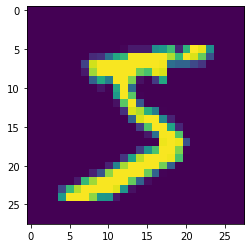

tensor(5)


In [8]:
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [9]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [10]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [11]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()

    self.conv1 = torch.nn.Conv2d(in_channels=1,
                                 out_channels=6,
                                 kernel_size=5,
                                 padding=2)
    self.act1 = torch.nn.ReLU()
    self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

    self.conv2 = torch.nn.Conv2d(in_channels=6,
                                 out_channels=16,
                                 kernel_size=5,
                                 padding=0)
    self.act2 = torch.nn.ReLU()
    self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)

    self.fc1 = torch.nn.Linear(5 * 5 * 16, 120)
    self.act3 = torch.nn.ReLU()

    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.ReLU()

    self.fc3 = torch.nn.Linear(84, 10)

  def forward(self, x):

    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)

    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)

    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)

    return x

In [26]:
lenet5 = LeNet5()

In [27]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [30]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(lenet5.parameters(), lr=1.0e-2, momentum=0.7)

In [31]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()

    batch_indexes = order[start_index : start_index + batch_size]

    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)

    preds = lenet5.forward(X_batch)

    loss_value = loss(preds, y_batch)
    loss_value.backward()

    optimizer.step()

  test_preds = lenet5.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test).data.cpu())

  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)

  print(accuracy)

tensor(0.9484)
tensor(0.9591)
tensor(0.9632)
tensor(0.9542)
tensor(0.9673)
tensor(0.9732)
tensor(0.9718)
tensor(0.9734)
tensor(0.9749)
tensor(0.9758)
tensor(0.9755)
tensor(0.9758)
tensor(0.9767)
tensor(0.9784)
tensor(0.9762)
tensor(0.9784)
tensor(0.9795)
tensor(0.9760)
tensor(0.9766)
tensor(0.9784)
tensor(0.9778)
tensor(0.9816)
tensor(0.9788)
tensor(0.9803)
tensor(0.9812)
tensor(0.9792)
tensor(0.9821)
tensor(0.9803)
tensor(0.9796)
tensor(0.9730)
tensor(0.9822)
tensor(0.9799)
tensor(0.9801)
tensor(0.9813)
tensor(0.9813)
tensor(0.9811)
tensor(0.9791)
tensor(0.9807)
tensor(0.9775)
tensor(0.9807)
tensor(0.9816)
tensor(0.9793)
tensor(0.9802)
tensor(0.9806)
tensor(0.9766)
tensor(0.9789)
tensor(0.9757)
tensor(0.9755)
tensor(0.9769)
tensor(0.9802)


KeyboardInterrupt: ignored

In [32]:
lenet5.forward(X_test)

tensor([[-13.9119,  -3.6881,  -1.4974,  ...,  27.3922,  -7.5361,  -1.6428],
        [ -6.6083,  -9.1704,  48.6193,  ..., -10.0857,  -3.7596,  -8.7927],
        [ -0.3301,  18.4073,  -0.6870,  ...,   1.7361,   4.9762,   0.4974],
        ...,
        [-19.9269,   5.7736,  -4.6266,  ...,   3.7531,  -2.9065,  -5.7070],
        [-10.8183,  -5.1413, -11.1169,  ..., -12.8258,   7.4589,   3.1607],
        [ -3.8149,   4.5449,  -4.1512,  ..., -26.0204,   2.6754, -38.4975]],
       device='cuda:0', grad_fn=<AddmmBackward>)

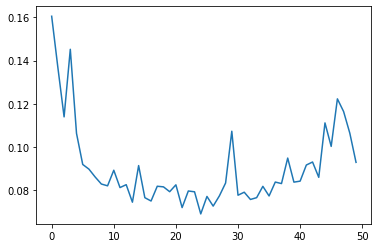

In [33]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);